In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('/content/Covid Data.csv')

In [38]:
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [39]:
data.drop(columns = ["INTUBED","ICU"] , inplace=True)

In [40]:
data['SURVIVAL'] = data['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' else 1)
data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,SURVIVAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,03/06/2020,1,72,97,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,09/06/2020,2,55,97,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,21/06/2020,2,68,97,1,2,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,97,2,2,2,2,2,2,2,2,2,2,7,0
1048571,1,13,2,2,9999-99-99,2,51,97,2,2,2,2,1,2,2,2,2,2,7,0
1048572,2,13,2,1,9999-99-99,2,55,97,2,2,2,2,2,2,2,2,2,2,7,0
1048573,2,13,2,1,9999-99-99,2,28,97,2,2,2,2,2,2,2,2,2,2,7,0


In [41]:
data.drop(columns = ["DATE_DIED"] , inplace=True)

In [42]:
data.replace({97: np.nan , 99: np.nan }, inplace=True)


In [43]:
missing_values = np.isnan(data).sum()
print(missing_values)

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
PNEUMONIA                16003
AGE                        221
PREGNANT                523511
DIABETES                     0
COPD                         0
ASTHMA                       0
INMSUPR                      0
HIPERTENSION                 0
OTHER_DISEASE                0
CARDIOVASCULAR               0
OBESITY                      0
RENAL_CHRONIC                0
TOBACCO                      0
CLASIFFICATION_FINAL         0
SURVIVAL                     0
dtype: int64


In [44]:
data.drop(columns=['PREGNANT','MEDICAL_UNIT'], inplace = True)
data

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,SURVIVAL
0,2,1,1,1.0,65.0,2,2,2,2,1,2,2,2,2,2,3,1
1,2,2,1,1.0,72.0,2,2,2,2,1,2,2,1,1,2,5,1
2,2,2,2,2.0,55.0,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,2.0,53.0,2,2,2,2,2,2,2,2,2,2,7,1
4,2,2,1,2.0,68.0,1,2,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,2,1,2.0,40.0,2,2,2,2,2,2,2,2,2,2,7,0
1048571,1,2,2,2.0,51.0,2,2,2,2,1,2,2,2,2,2,7,0
1048572,2,2,1,2.0,55.0,2,2,2,2,2,2,2,2,2,2,7,0
1048573,2,2,1,2.0,28.0,2,2,2,2,2,2,2,2,2,2,7,0


In [45]:
data.replace({97: None, 99: None}, inplace=True)
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-45-b3cfc3df3c6e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [46]:
missing_values_1 = np.isnan(data).sum()
print(missing_values_1)

USMER                   0
SEX                     0
PATIENT_TYPE            0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
SURVIVAL                0
dtype: int64


In [47]:
X = data.drop('SURVIVAL', axis=1)
y = data['SURVIVAL']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_1 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20972/20972 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9338 - loss: 0.1437 - val_accuracy: 0.9375 - val_loss: 0.1319
Epoch 2/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9375 - loss: 0.1312 - val_accuracy: 0.9378 - val_loss: 0.1310
Epoch 3/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.9383 - loss: 0.1289 - val_accuracy: 0.9385 - val_loss: 0.1298
Epoch 4/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - accuracy: 0.9383 - loss: 0.1289 - val_accuracy: 0.9382 - val_loss: 0.1296
Epoch 5/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.9380 - loss: 0.1298 - val_accuracy: 0.9385 - val_loss: 0.1295
Epoch 6/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - accuracy: 0.9385 - loss: 0.1290 - val_accuracy: 0.9389 - val_loss: 0.1298
Epoch 7/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9392 - loss: 0.1282 - val_accuracy: 0.9388 - val_loss: 0.1296
Epoch 8/10
20972/20972 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - accuracy: 0.9390 - lo

In [51]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

6554/6554 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9397 - loss: 0.1287
Test Accuracy: 0.9390
6554/6554 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


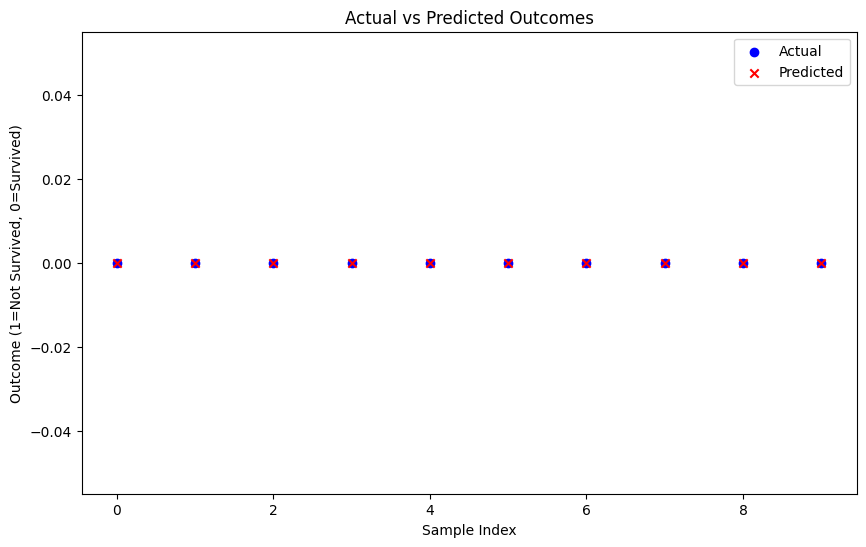

In [52]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test[:10])), y_test[:10], color="blue", label="Actual", marker="o")
plt.scatter(range(len(y_pred[:10])), y_pred[:10], color="red", label="Predicted", marker="x")


plt.xlabel("Sample Index")
plt.ylabel("Outcome (1=Not Survived, 0=Survived)")
plt.title("Actual vs Predicted Outcomes")
plt.legend()
plt.show()

